In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling



# Importing the data

## Checking dimension, structure, length of the data and loading it

Here I will use a shell-Linux command to check the first 3 lines of the file and the length of the document 🔍

In [2]:
!head --lines=3 PM_train.txt

1 1 -0.0007 -0.0004 100.0 518.67 641.82 1589.70 1400.60 14.62 21.61 554.36 2388.06 9046.19 1.30 47.47 521.66 2388.02 8138.62 8.4195 0.03 392 2388 100.00 39.06 23.4190  
1 2 0.0019 -0.0003 100.0 518.67 642.15 1591.82 1403.14 14.62 21.61 553.75 2388.04 9044.07 1.30 47.49 522.28 2388.07 8131.49 8.4318 0.03 392 2388 100.00 39.00 23.4236  
1 3 -0.0043 0.0003 100.0 518.67 642.35 1587.99 1404.20 14.62 21.61 554.26 2388.08 9052.94 1.30 47.27 522.42 2388.03 8133.23 8.4178 0.03 390 2388 100.00 38.95 23.3442  


In [3]:
!wc --lines PM_train.txt

20631 PM_train.txt


The data structure is a text file with a visual pattern: for each variable value, it is separated by a blank space, and at the end of each observation a line break, the `read_csv()` can do the job with the separator specified:

In [11]:
# define column names for easy indexing
index_names = ['Asset id', 'runtime']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['Tag'+str(n) for n in range(1,22)] 
col_names = index_names + setting_names + sensor_names

# read data
train_data = pd.read_csv('PM_train.txt', sep='\s+', header=None, names=col_names)
test_data = pd.read_csv('PM_test.txt', sep='\s+', header=None, names=col_names)

train_data.head()

,Asset id,runtime,setting_1,setting_2,setting_3,Tag1,Tag2,Tag3,Tag4,Tag5,...,Tag12,Tag13,Tag14,Tag15,Tag16,Tag17,Tag18,Tag19,Tag20,Tag21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


# Exploratory Data Analysis

In [7]:
# This is a automated exploratory analysis with pandas profiling package
profile_test = test_data.profile_report(title='Report for test data')
profile_test.to_file(output_file='reports/test.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

medium working time: 206.31
max working time: 362
min working time: 128


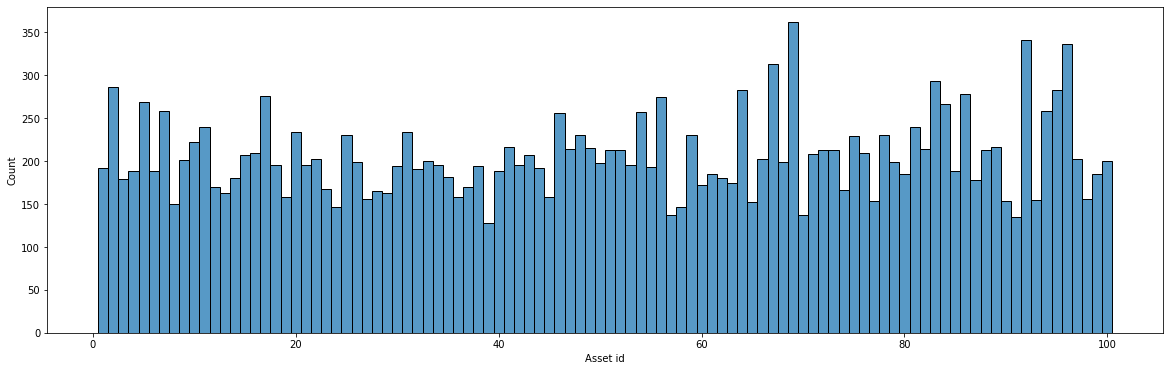

In [8]:
plt.figure(figsize=(20,6))
sns.histplot(x='Asset id',
             data=train_data,
             bins=100)

print("medium working time:", train_data['Asset id'].value_counts().mean())
print("max working time:", train_data['Asset id'].value_counts().max())
print("min working time:", train_data['Asset id'].value_counts().min())

In [9]:
print("medium working time:", train_data['runtime'].mean())
print("max working time:", train_data['runtime'].max())
print("min working time:", train_data['runtime'].min())

medium working time: 108.80786195530997
max working time: 362
min working time: 1
